# Fitbit Data Analysis

### About the data

This is a data set from the company BellaBeat, a tech manufacturer with health focused products and an emphasis on analyzing data from wearable health devices such as the Apple Watch, Fitbit, or Whoop Strap. This data set is a collection of samples from roughly 30 women who were continuously wearing a Fitbit device.

### Tasks

1. Identify trends in device usage
1. Explore application of these trends to benefit the user through recommendations
1. Explore trends for marketing strategy and potential for future growth

In [2]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.options.mode.chained_assignment = None


### Import Data

In [3]:
activity = pd.read_csv('/Users/colinhicks/Documents/data_science/data_sets/fitbit_tracker/fitabase_data/dailyActivity_merged.csv')
calories = pd.read_csv('/Users/colinhicks/Documents/data_science/data_sets/fitbit_tracker/fitabase_data/hourlyCalories_merged.csv')
intensities = pd.read_csv('/Users/colinhicks/Documents/data_science/data_sets/fitbit_tracker/fitabase_data/hourlyIntensities_merged.csv')
sleep = pd.read_csv('/Users/colinhicks/Documents/data_science/data_sets/fitbit_tracker/fitabase_data/sleepDay_merged.csv')
weight = pd.read_csv('/Users/colinhicks/Documents/data_science/data_sets/fitbit_tracker/fitabase_data/weightLogInfo_merged.csv')

 ### Data Cleaning

In [4]:
# convert dates to datetime format and seperate date and time if needed.

activity['correctdate'] = pd.to_datetime(activity['ActivityDate'],
                                         format = '%m/%d/%Y').dt.strftime('%Y-%m-%d')
calories['correctdate'] = pd.to_datetime(calories['ActivityHour'],
                                         format = '%m/%d/%Y %I:%M:%S %p').dt.strftime('%Y-%m-%d')
calories['correcttime'] = pd.to_datetime(calories['ActivityHour'],
                                         format = '%m/%d/%Y %I:%M:%S %p').dt.strftime('%H:%M:%S')
intensities['correctdate'] = pd.to_datetime(intensities['ActivityHour'],
                                         format = '%m/%d/%Y %I:%M:%S %p').dt.strftime('%Y-%m-%d')
intensities['correcttime'] = pd.to_datetime(intensities['ActivityHour'],
                                         format = '%m/%d/%Y %I:%M:%S %p').dt.strftime('%H:%M:%S')
sleep['correctdate'] = pd.to_datetime(sleep['SleepDay'],
                                         format = '%m/%d/%Y %H:%M:%S %p').dt.strftime('%Y-%m-%d')
sleep['correcttime'] = pd.to_datetime(sleep['SleepDay'],
                                         format = '%m/%d/%Y %H:%M:%S %p').dt.strftime('%H:%M:%S %p')
weight['correctdate'] = pd.to_datetime(weight['Date'],
                                         format = '%m/%d/%Y %H:%M:%S %p').dt.strftime('%Y-%m-%d')
weight['correcttime'] = pd.to_datetime(weight['Date'],
                                         format = '%m/%d/%Y %H:%M:%S %p').dt.strftime('%H:%M:%S %p')

### Exploratory Analysis

In [5]:
# explore data

activity['Id'].nunique()
calories['Id'].nunique()
intensities['Id'].nunique()
sleep['Id'].nunique()
weight['Id'].nunique()

33

33

33

24

8

After counting, it appears that the weight dataset only has 8 samples, while sleep has 24 and the rest contain 33 samples. Next we will summarize the data.

In [6]:
# summarize the data
print('activity')
activity[['TotalSteps','TotalDistance', 'SedentaryMinutes','Calories']].describe()
print('number of active minutes by category')
activity[['VeryActiveMinutes','FairlyActiveMinutes', 'LightlyActiveMinutes']].describe()
print('calories')
calories[['Calories']].describe()
print('sleep')
sleep[['TotalSleepRecords','TotalMinutesAsleep','TotalTimeInBed']].describe()

activity


,TotalSteps,TotalDistance,SedentaryMinutes,Calories
count,940.000000,940.000000,940.000000,940.000000
mean,7637.910638,5.489702,991.210638,2303.609574
std,5087.150742,3.924606,301.267437,718.166862
min,0.000000,0.000000,0.000000,0.000000
25%,3789.750000,2.620000,729.750000,1828.500000
50%,7405.500000,5.245000,1057.500000,2134.000000
75%,10727.000000,7.712500,1229.500000,2793.250000
max,36019.000000,28.030001,1440.000000,4900.000000


number of active minutes by category


,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes
count,940.000000,940.000000,940.000000
mean,21.164894,13.564894,192.812766
std,32.844803,19.987404,109.174700
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,127.000000
50%,4.000000,6.000000,199.000000
75%,32.000000,19.000000,264.000000
max,210.000000,143.000000,518.000000


calories


,Calories
count,22099.000000
mean,97.386760
std,60.702622
min,42.000000
25%,63.000000
50%,83.000000
75%,108.000000
max,948.000000


sleep


,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,413.000000,413.000000,413.000000
mean,1.118644,419.467312,458.639225
std,0.345521,118.344679,127.101607
min,1.000000,58.000000,61.000000
25%,1.000000,361.000000,403.000000
50%,1.000000,433.000000,463.000000
75%,1.000000,490.000000,526.000000
max,3.000000,796.000000,961.000000


**Observations from the summary**

- The average sedentary time is 991, or roughly 16 hours.
    - Perhaps this is reasonable, with 8 hours or sleep and an 8 hour work day. However, it could still be a metric to improve upon.
- The average amount of sleep is 419 minutes, or about 7 hours
    - However, 25% of participants sleep for 361 minutes or less. That's under 6 hours per night which might not be optimal for recovery.


### Merge Data

In order to visualize, I need to merge the data. I'll use the unique ID associated to each user and the "correctdate" column I created to join the sleep and activity datasets.  

In [7]:
# merge data

sleep_activity_df = pd.merge(activity, sleep, on=['Id', 'correctdate'])

In [8]:
sleep_activity_df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,correctdate,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,correcttime
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,13,328,728,1985,2016-04-12,4/12/2016 12:00:00 AM,1,327,346,12:00:00 PM
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,19,217,776,1797,2016-04-13,4/13/2016 12:00:00 AM,2,384,407,12:00:00 PM
2,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,34,209,726,1745,2016-04-15,4/15/2016 12:00:00 AM,1,412,442,12:00:00 PM
3,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,10,221,773,1863,2016-04-16,4/16/2016 12:00:00 AM,2,340,367,12:00:00 PM
4,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,...,20,164,539,1728,2016-04-17,4/17/2016 12:00:00 AM,1,700,712,12:00:00 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,8792009665,4/30/2016,7174,4.59,4.59,0.0,0.33,0.36,3.91,0.0,...,20,301,749,2896,2016-04-30,4/30/2016 12:00:00 AM,1,343,360,12:00:00 PM
409,8792009665,5/1/2016,1619,1.04,1.04,0.0,0.00,0.00,1.04,0.0,...,0,79,834,1962,2016-05-01,5/1/2016 12:00:00 AM,1,503,527,12:00:00 PM
410,8792009665,5/2/2016,1831,1.17,1.17,0.0,0.00,0.00,1.17,0.0,...,0,101,916,2015,2016-05-02,5/2/2016 12:00:00 AM,1,415,423,12:00:00 PM
411,8792009665,5/3/2016,2421,1.55,1.55,0.0,0.00,0.00,1.55,0.0,...,0,156,739,2297,2016-05-03,5/3/2016 12:00:00 AM,1,516,545,12:00:00 PM


In [9]:
# drop unneeded columns
sleep_activity_df = sleep_activity_df.drop(['ActivityDate','LoggedActivitiesDistance','TrackerDistance','SedentaryActiveDistance','SleepDay','correcttime'], axis = 1)

In [10]:
sleep_activity_df

,Id,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,correctdate,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,13162,8.50,1.88,0.55,6.06,25,13,328,728,1985,2016-04-12,1,327,346
1,1503960366,10735,6.97,1.57,0.69,4.71,21,19,217,776,1797,2016-04-13,2,384,407
2,1503960366,9762,6.28,2.14,1.26,2.83,29,34,209,726,1745,2016-04-15,1,412,442
3,1503960366,12669,8.16,2.71,0.41,5.04,36,10,221,773,1863,2016-04-16,2,340,367
4,1503960366,9705,6.48,3.19,0.78,2.51,38,20,164,539,1728,2016-04-17,1,700,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,8792009665,7174,4.59,0.33,0.36,3.91,10,20,301,749,2896,2016-04-30,1,343,360
409,8792009665,1619,1.04,0.00,0.00,1.04,0,0,79,834,1962,2016-05-01,1,503,527
410,8792009665,1831,1.17,0.00,0.00,1.17,0,0,101,916,2015,2016-05-02,1,415,423
411,8792009665,2421,1.55,0.00,0.00,1.55,0,0,156,739,2297,2016-05-03,1,516,545


In [11]:
# rearrange columns

sa_df_cleaned = sleep_activity_df.iloc[:413, [0,11,1,2,3,4,5,6,7,8,9,10,12,13,14]]

In [12]:
sa_df_cleaned

,Id,correctdate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,1.88,0.55,6.06,25,13,328,728,1985,1,327,346
1,1503960366,2016-04-13,10735,6.97,1.57,0.69,4.71,21,19,217,776,1797,2,384,407
2,1503960366,2016-04-15,9762,6.28,2.14,1.26,2.83,29,34,209,726,1745,1,412,442
3,1503960366,2016-04-16,12669,8.16,2.71,0.41,5.04,36,10,221,773,1863,2,340,367
4,1503960366,2016-04-17,9705,6.48,3.19,0.78,2.51,38,20,164,539,1728,1,700,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,8792009665,2016-04-30,7174,4.59,0.33,0.36,3.91,10,20,301,749,2896,1,343,360
409,8792009665,2016-05-01,1619,1.04,0.00,0.00,1.04,0,0,79,834,1962,1,503,527
410,8792009665,2016-05-02,1831,1.17,0.00,0.00,1.17,0,0,101,916,2015,1,415,423
411,8792009665,2016-05-03,2421,1.55,0.00,0.00,1.55,0,0,156,739,2297,1,516,545


### Visualize the Data

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation matrix for Sleep and Activity')

Text(0.5, 15.0, 'Sleep features')

Text(32.99999999999999, 0.5, 'Activity features')

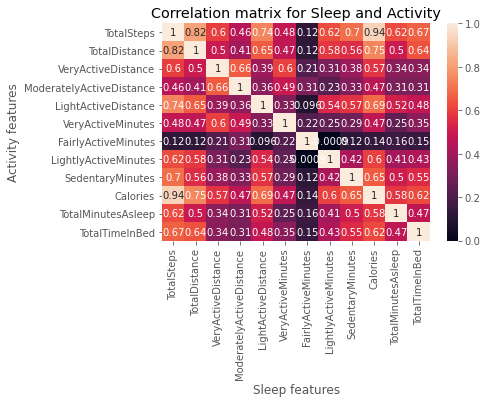

In [13]:
# pearson correlation heat map for features in sa_df_cleaned

corr_matrix = sa_df_cleaned.iloc[0:413, [2,3,4,5,6,7,8,9,10,11,13,14]].apply(lambda x: x.factorize()[0]).corr(method='pearson')
sns.heatmap(corr_matrix, annot = True)
plt.title("Correlation matrix for Sleep and Activity")
plt.xlabel("Sleep features")
plt.ylabel("Activity features")
plt.show()

In [14]:
# sort correlations to see what is significant

corr_mat = sa_df_cleaned.corr()
corr_pairs = corr_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
sorted_pairs


TotalTimeInBed        SedentaryMinutes     -0.618713
SedentaryMinutes      TotalTimeInBed       -0.618713
TotalMinutesAsleep    SedentaryMinutes     -0.599394
SedentaryMinutes      TotalMinutesAsleep   -0.599394
LightlyActiveMinutes  SedentaryMinutes     -0.264182
                                              ...   
VeryActiveDistance    VeryActiveDistance    1.000000
TotalDistance         TotalDistance         1.000000
TotalSteps            TotalSteps            1.000000
TotalMinutesAsleep    TotalMinutesAsleep    1.000000
TotalTimeInBed        TotalTimeInBed        1.000000
Length: 196, dtype: float64

In [15]:
# filter for significant data
high_corr = sorted_pairs[((sorted_pairs) > .6) & ((sorted_pairs) < 1)]
high_corr

VeryActiveMinutes         Calories                    0.610489
Calories                  VeryActiveMinutes           0.610489
VeryActiveDistance        TotalSteps                  0.677084
TotalSteps                VeryActiveDistance          0.677084
TotalDistance             VeryActiveDistance          0.702748
VeryActiveDistance        TotalDistance               0.702748
VeryActiveMinutes         VeryActiveDistance          0.850184
VeryActiveDistance        VeryActiveMinutes           0.850184
LightActiveDistance       LightlyActiveMinutes        0.853070
LightlyActiveMinutes      LightActiveDistance         0.853070
TotalTimeInBed            TotalMinutesAsleep          0.930457
TotalMinutesAsleep        TotalTimeInBed              0.930457
FairlyActiveMinutes       ModeratelyActiveDistance    0.945402
ModeratelyActiveDistance  FairlyActiveMinutes         0.945402
TotalDistance             TotalSteps                  0.981533
TotalSteps                TotalDistance               0

Many of these highly correlated pairs seem obvious, such as Very Active Minutes correlate highly to Moderately Active Distance. However, I am interested in the Total Time In Bed and Total Minutes Asleep pair. I also want to look at some pairs that are less correlated but may offer some unique insight. Such as Total Steps paired with Calories. Or Total Minutes Asleep and Calories to see if burning more calories during the day will result in more sleep.

<AxesSubplot:xlabel='Calories', ylabel='TotalSteps'>

Text(0.5, 1.0, 'Correlation for Calories and TotalSteps')

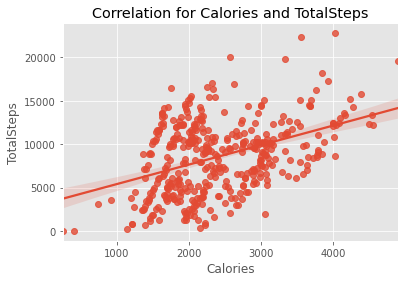

In [16]:
# visualize correlation between Calories and Total Steps
x = sa_df_cleaned.Calories
y = sa_df_cleaned.TotalSteps
sns.regplot(x=x,y=y)
plt.title("Correlation for Calories and TotalSteps")

I see a positive correlation with Total Steps and Calories.

<AxesSubplot:xlabel='Calories', ylabel='TotalMinutesAsleep'>

Text(0.5, 1.0, 'Correlation for Calories and Total Minutes Asleep')

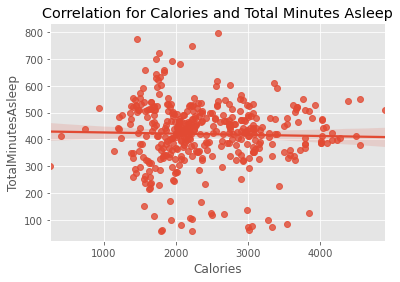

In [17]:
# visualize correlation between Calories and Total Minutes Asleep
y = sa_df_cleaned.TotalMinutesAsleep
sns.regplot(x=x,y=y)
plt.title("Correlation for Calories and Total Minutes Asleep")

I don't see much of a correlation between Total Minutes Asleep and Calories.

<AxesSubplot:xlabel='TotalTimeInBed', ylabel='TotalMinutesAsleep'>

Text(0.5, 1.0, 'Correlation for Total Time In Bed and Total Minutes Asleep')

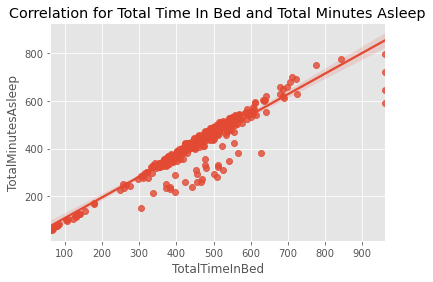

In [18]:
# visualize correlation between Total Time In Bed and Total Minutes Asleep

x = sa_df_cleaned.TotalTimeInBed
y = sa_df_cleaned.TotalMinutesAsleep
sns.regplot(x=x,y=y)
plt.title("Correlation for Total Time In Bed and Total Minutes Asleep")

There is certainly a strong positive correlation between Total Minutes Asleep and Total Time In Bed. This could indicate the benefits for a sleep reminder, as that could lead to an increase in time spent sleeping.

<AxesSubplot:xlabel='Calories', ylabel='VeryActiveMinutes'>

<AxesSubplot:xlabel='Calories', ylabel='FairlyActiveMinutes'>

<AxesSubplot:xlabel='Calories', ylabel='LightlyActiveMinutes'>

Text(0.5, 1.0, 'Correlation for Calories and State of Active Minutes')

Text(0.5, 0, 'Calories Burned')

Text(0, 0.5, 'Active Minutes')

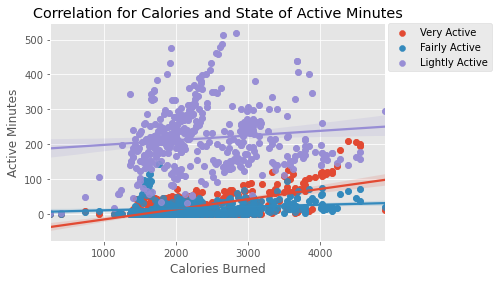

In [19]:
# compare Calories burned by varying degrees of Activity in Minutes
x = sa_df_cleaned.Calories
vam = sa_df_cleaned.VeryActiveMinutes
fam = sa_df_cleaned.FairlyActiveMinutes
lam = sa_df_cleaned.LightlyActiveMinutes
plt.scatter(x=x,y=vam, label='Very Active')
plt.scatter(x=x,y=fam, label='Fairly Active')
plt.scatter(x=x,y=lam, label='Lightly Active')
sns.regplot(x=x,y=vam)
sns.regplot(x=x,y=fam)
sns.regplot(x=x,y=lam)
plt.title("Correlation for Calories and State of Active Minutes")
plt.xlabel("Calories Burned")
plt.ylabel("Active Minutes")
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

**The correlations for Calories over multiple levels of Active Minutes indicates a number of insights.**
- One can choose to be in a Very Active or Fairly Active state and still result in a similar amount of Calories Burned. The only stipulation being the time spent in that active state may need to be longer if one is choosing to be Fairly Active rather than Very Active.
- There is even potential for Lightly Active Minutes to result in a similar amount of Calories Burned, but one must spend much more time in that state to burn an equal amount of calories compared to the Fairly Active and Very Active states.
- The strongest correlation between Calories Burned and Active Minutes is the Very Active State

Next we will look at time series data regarding intensities.

<BarContainer object of 24 artists>

Text(0.5, 1.0, 'Average Total Intensity over time')

Text(0.5, 0, 'Average  Total Intensity')

Text(0, 0.5, 'Time')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 1080x288 with 0 Axes>

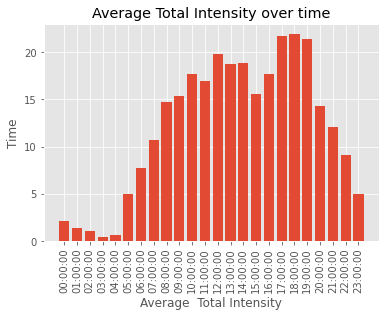

<Figure size 1080x288 with 0 Axes>

In [27]:
# visualize average total intensity grouped by time

intensity_per_time = intensities.groupby(
    ['correcttime'], as_index=False).mean(
    {'TotalIntensity'}
)

x = intensity_per_time.correcttime
y = intensity_per_time.TotalIntensity

plt.bar(x,y)
plt.title('Average Total Intensity over time')
plt.xlabel('Average  Total Intensity')
plt.ylabel('Time')
plt.xticks(rotation=90)
plt.figure(figsize=(15, 4))
plt.show()

- Individuals seem to be most active **between 5:00pm and 7:00pm.**
    - Offering a reminder to get up and exercise around 5:00pm may encourage this further
    
- There is a small spike in activity around Noon.
    - Offering a reminder here could be a way to encourage multiple intensity spikes through out the day, leading to less sedentary time and more active minutes.
    
Next we will look at one of the reasons one may find it important to reduce sedentary time.

In [ ]:
# visualize correlation between Sedentary Minutes and Total Minutues Asleep
x = sa_df_cleaned.SedentaryMinutes
y = sa_df_cleaned.TotalMinutesAsleep
sns.regplot(x=x,y=y)
plt.title('Sedentary Minutes and Total Minutues Asleep')

This negative correlation between Total Minutes Asleep and Sedentary Minutes is one of the more important insights I found in the data.
- The more Sedentary Minutes one has throughout the day, the less Total Minutes Asleep one achieves.
- Therefore, a recommendation to reduce Sedentary Minutes, or to increase activity of any sort, could drastically increase Total Minutes Asleep, if that is the users goal.

### Conclusion

Collecting data on activity and sleep can equip users with the knowledge on how to achieve more quality sleep and help recover for the following day. While increasing calories burned during the day may seem like a good way to increase duration of sleep, this was not backed by the data we've seen in this collection of samples. What is effective in achieving more time asleep is minimizing sedentary time overall, regardless of what level of intensity replaces that sedentary time. Decreasing sedentary time overall and setting a sleep reminder would be an optimal step towards more quality sleep habits.